In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D

*Below is the definition for function f(x1,x2)*

In [2]:
def fun(X1, X2):
    
    return (X1**2 + (X2-2)**2)

*Below is the definition for a function to plot the given function f(x1,x2) in 3D.*

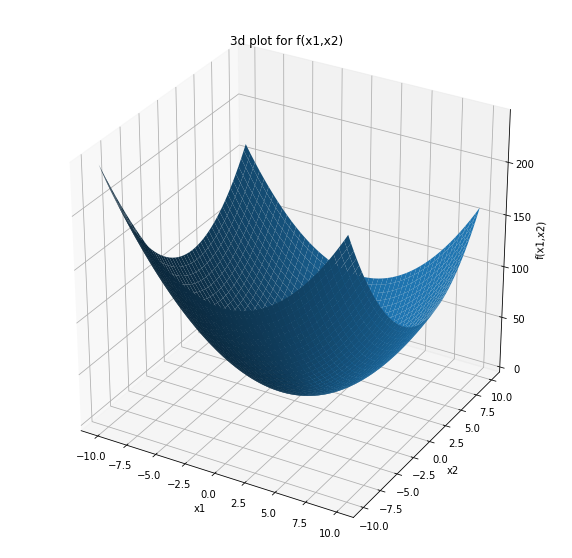

In [3]:
def plot_fn():
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    # Generating a sample for the function
    x1 = x2 = np.arange(-10.0, 10.0, 0.1)
    X1, X2 = np.meshgrid(x1, x2)
    zs = np.array([fun(x1,x2) for x1,x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = zs.reshape(X1.shape)

    ax.plot_surface(X1, X2, Z)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    ax.set_title("3d plot for f(x1,x2)")

    return plt.show()
    
plot_fn()

*Below is the definition for two functions that return the derivatives of function f(x1,x2) with respect to x1 and with respect to x2 respectively.* 

In [4]:
def df_dx1(x1):
    
    return (2*x1)

def df_dx2(x2):
    
    return ((2*(x2-2)))

In [5]:
def plot(x1,x2,iterations):
    fig, ax1 = plt.subplots()
    color = 'blue'
    ax1.plot(x1, linestyle='solid',label='x1', color = 'red')
    ax1.plot(x2, linestyle='dotted',label='x2', color = 'green')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('X', color=color)
    ax1.set_xlim([0,iterations])
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    plt.show()

*Below is the definition for a function that performs Gradient Descent.*

In [6]:
def gradient_descent(start, maximum, rho):
    
    points_sequence = [np.array(start)] # Array to store the sequence of points
    z = start
    l2_norm = LA.norm([df_dx1(z[0]), df_dx2(z[1])],2)  # L2(Euclidian) norm
    iterations = 0 # This is a variable to keep a count of the loop iterations
    
    while(l2_norm >= 0.001 and iterations < maximum):
        z = z - rho*(np.array([df_dx1(z[0]), df_dx2(z[1])]))
        points_sequence.append(z) # Adding the new points to sequence
        l2_norm = LA.norm([df_dx1(z[0]), df_dx2(z[1])],2)
        iterations += 1

    print("Number of iterations to convergence = ", iterations)
    
    return np.array(points_sequence), iterations

*Below is the number of iterations and the plot for learning rate ρ = 0.01 and the initial point (x1, x2) = (1, 1).*

Number of iterations to convergence =  394


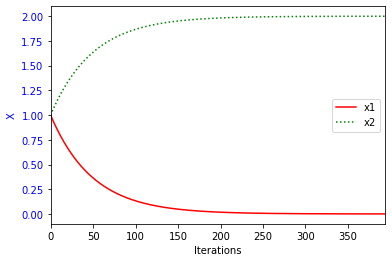

In [7]:
final_sequence,iterations = gradient_descent([1,1],1000,0.01)
plot(final_sequence[:,0],final_sequence[:,1],iterations)

*Below is the number of iterations and the plot for learning rate ρ = 0.1 and the initial point (x1, x2) = (1, 1).*

Number of iterations to convergence =  36


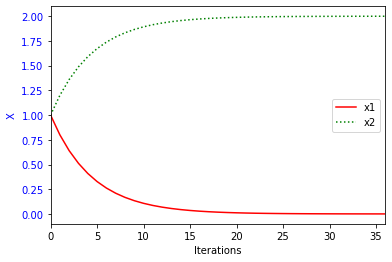

In [8]:
final_sequence,iterations = gradient_descent([1,1],1000,0.1)
plot(final_sequence[:,0],final_sequence[:,1],iterations)

*Below is the number of iterations and the plot for learning rate ρ = 5 and the initial point (x1, x2) = (1, 1).*

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys


Number of iterations to convergence =  10000


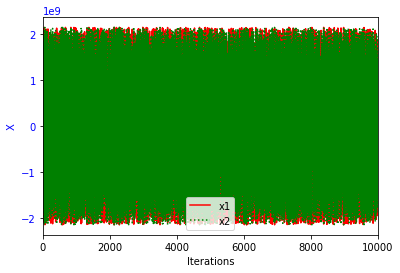

In [9]:
final_sequence,iterations = gradient_descent([1,1],10000,5)
plot(final_sequence[:,0],final_sequence[:,1],iterations)

*The Gradient Descent does not converge even after 10000 iterations, because the learning rate is too large, which causes overshooting.*